# Ex.10 
## Train a deep MLP on the MNIST dataset

In [21]:
import tensorflow as tf

(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_full.shape

(60000, 28, 28)

In [22]:
X_valid, y_valid = x_train_full[55000:]/255, y_train_full[55000:]
X_train, y_train = x_train_full[:55000]/255, y_train_full[:55000]
X_test, y_test = x_test/255, y_test

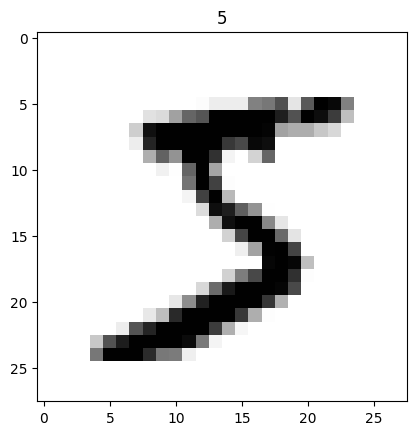

In [24]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='binary')
plt.title(y_train[0])
plt.show()

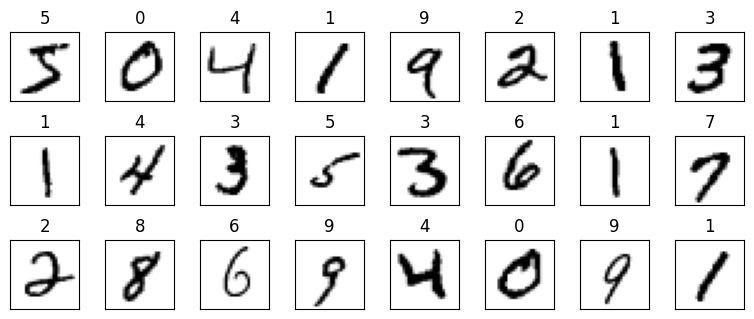

In [38]:
n_rows = 3
n_cols = 8

plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
plt.subplots_adjust(hspace=0.5)

for n, (img, target) in enumerate(zip(X_train[:24], y_train[:24])):
    plt.subplot(n_rows, n_cols, n + 1)
    plt.imshow(img, cmap='binary')
    plt.title(target)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)

In [39]:
K = tf.keras.backend

class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)